In [352]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import itertools
from datetime import datetime, date 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM ,GRU
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import io
from sklearn.preprocessing import LabelEncoder
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-video-game-sales/vgsales.csv


**this is a sales data of  popular video games and this project we will do explanatory data anlaysis and develop a model that can predict the sales in Japan using sales in North America and Europe and the other important features**

# Importing the data

In [353]:
df=pd.read_csv('/kaggle/input/global-video-game-sales/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Exploring the data set

In [354]:
df.shape

(16598, 11)

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**as we see above the data types of the columns the year data type is float**

In [356]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Key takaways 

1. the data consits of records from year 1980 to 2020
2. the global column has the higest maximum sale 



# EDA

In [357]:
df.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [358]:
global_sales_per_platform=df.groupby(['Platform'])['Global_Sales'].max().reset_index().sort_values(by='Global_Sales').tail(10)

<Figure size 1000x1000 with 0 Axes>

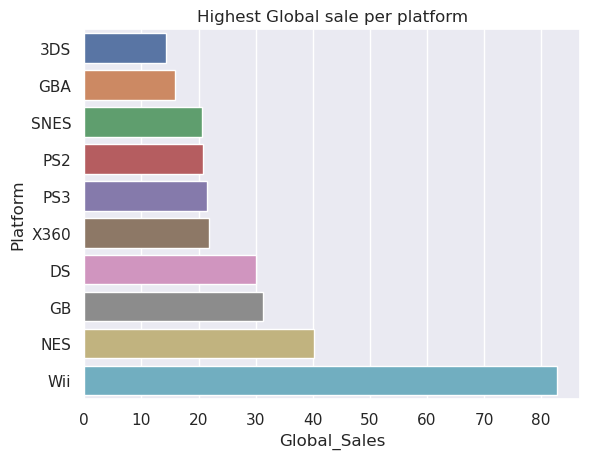

<Figure size 1000x1000 with 0 Axes>

In [359]:
sns.barplot(data=global_sales_per_platform, y='Platform',x='Global_Sales')
plt.title("Highest Global sale per platform")
plt.figure(figsize=(10, 10))

# key takeaway

**Nentendo will has the heighest global sale NES and GB third all nitendo products  Xbox and ps3 with similar global sales**

In [360]:
sales_col=df[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']]

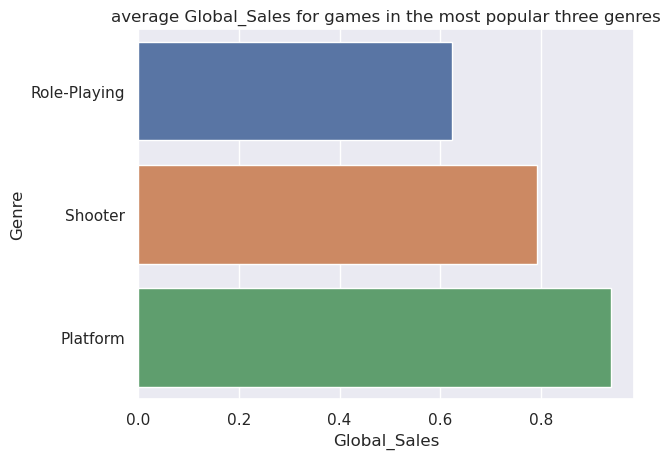

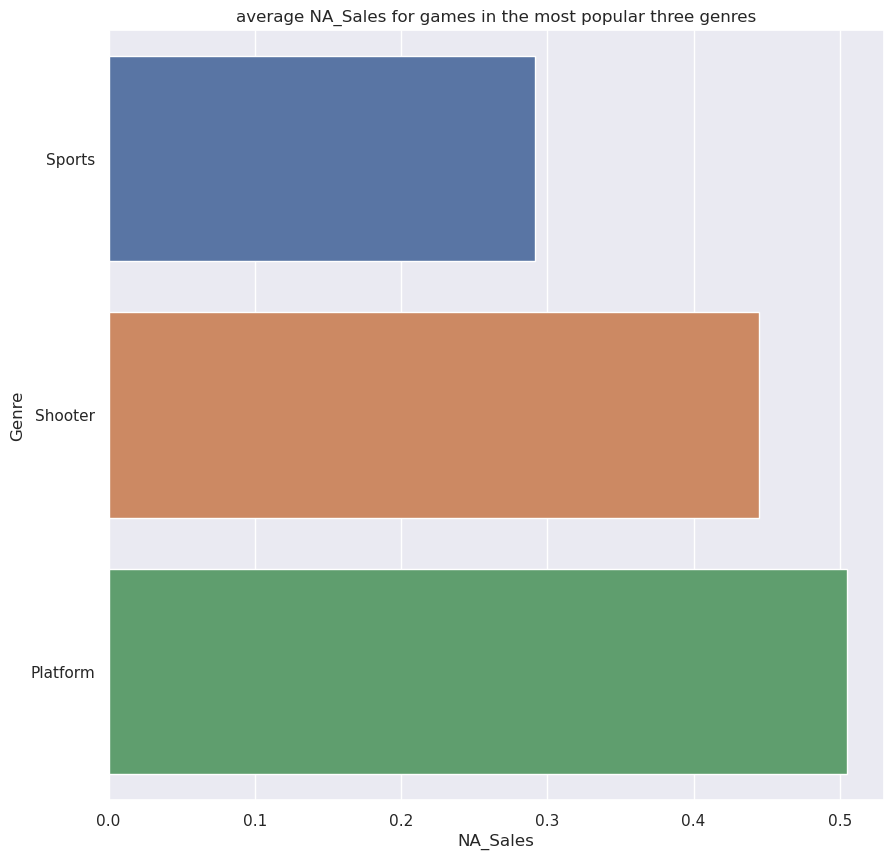

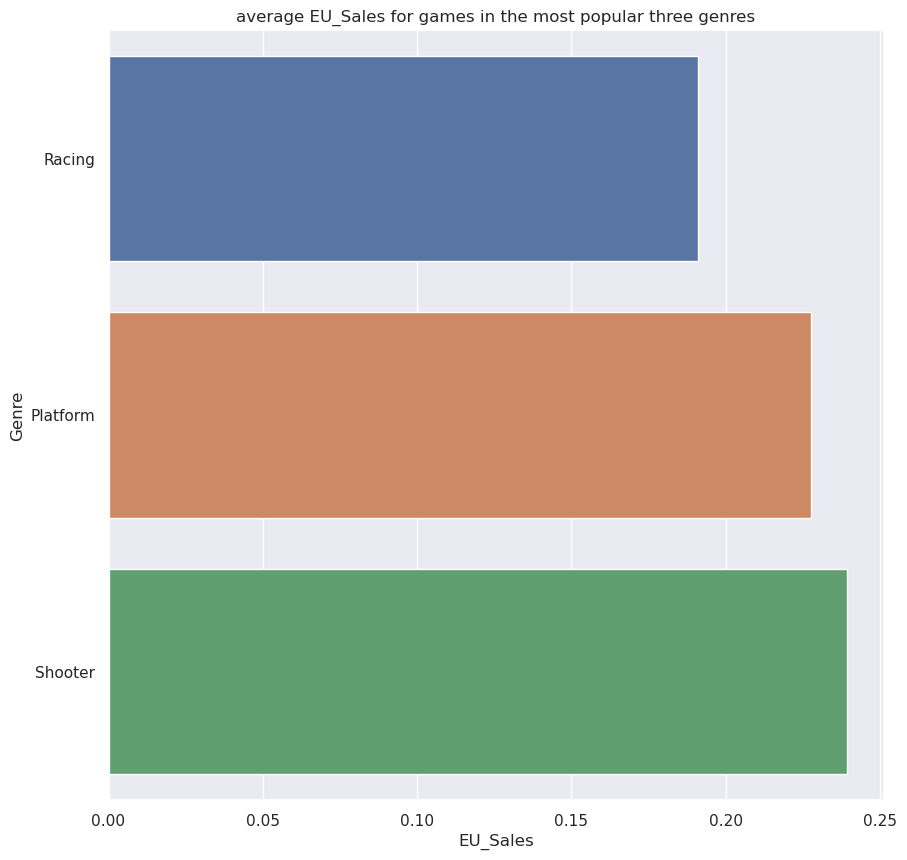

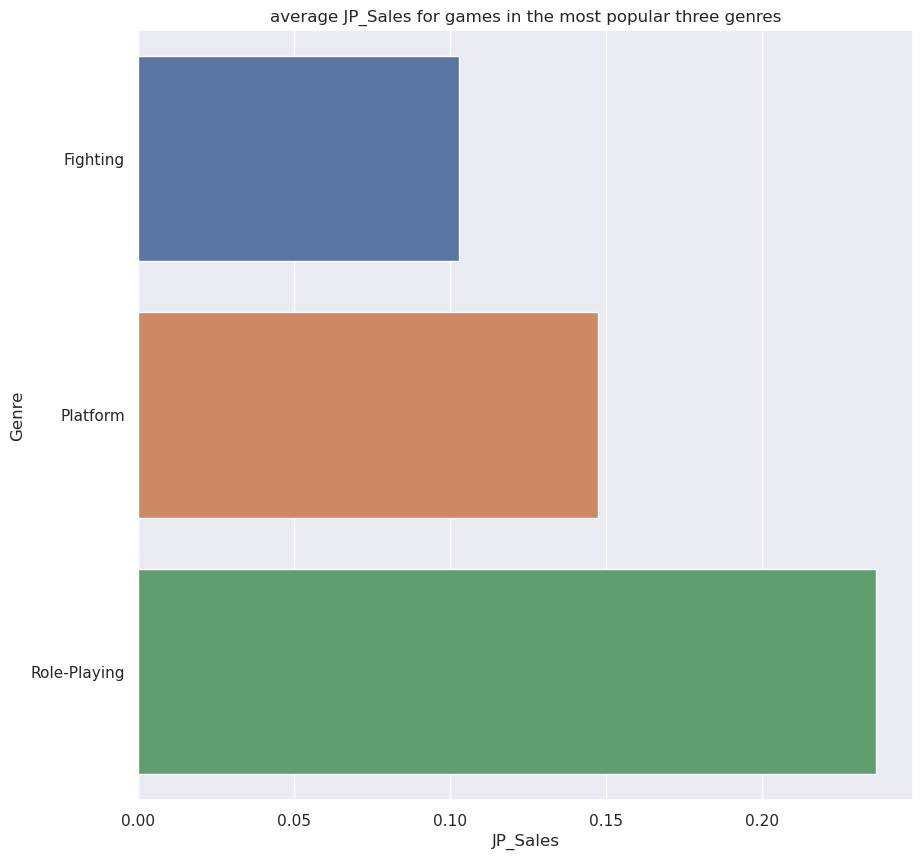

<Figure size 1000x1000 with 0 Axes>

In [361]:
for sales in sales_col:
    
    global_sales_per_gerene=df.groupby(['Genre'])[sales].mean().reset_index().sort_values(by=sales).tail(3)
    sns.barplot(data=global_sales_per_gerene, y='Genre',x=sales)
    plt.title("average {} for games in the most popular three genres".format(sales))
    plt.figure(figsize=(10, 10))

# Key takeaways

 **1.most popular genre differs for each sales with platform more popular in the global and north america sales 
2. japan's  popular  genre are role playing , platform and fighting which particulary not popular in the other sales**

# Data prepocessing 

In [362]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Cheak if there are irreglarity in the time series data

In [363]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
 # Convert timestamp to datetime if needed

# Compute the time differences between consecutive data points
time_diffs = df['Year'].diff()

# Check if all time differences are equal (indicating regular time steps) or not (indicating irregular time steps)
is_regular = time_diffs.dt.total_seconds().std() == 0

if is_regular:
    print("The time series has regular time steps.")
else:
    print("The time series has irregular time steps.")

The time series has irregular time steps.


 interpolate the data to estimate values at specific time steps. Interpolation can help fill in missing values between existing data points

In [364]:
df.set_index('Year', inplace=True)  # Set timestamp as the index

# Interpolate missing values
df_interpolated = df.interpolate(method='linear')

In [365]:
df_interpolated.isna().sum()

Rank             0
Name             0
Platform         0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

**Drop the 58 columns in the publisher**

In [366]:
df_interpolated.dropna(inplace=True)

In [367]:
df_interpolated.isnull().sum()

Rank            0
Name            0
Platform        0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [368]:
df_interpolated.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
2006-01-01,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1985-01-01,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2008-01-01,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2009-01-01,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
1996-01-01,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [369]:
df_interpolated.Name.value_counts()

Need for Speed: Most Wanted                12
FIFA 14                                     9
Madden NFL 07                               9
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
                                           ..
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
DanceDanceRevolution II                     1
Covert Ops: Nuclear Dawn                    1
Know How 2                                  1
Name: Name, Length: 11442, dtype: int64

In [370]:
category= ["Name", "Platform", "Genre", 'Publisher']

In [371]:
encoder = LabelEncoder()

In [372]:
df_interpolated[category] = df_interpolated[category].apply(encoder.fit_transform)

In [373]:
df_interpolated.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
2006-01-01,1,10959,26,10,359,41.49,29.02,3.77,8.46,82.74
1985-01-01,2,9289,11,4,359,29.08,3.58,6.81,0.77,40.24
2008-01-01,3,5549,26,6,359,15.85,12.88,3.79,3.31,35.82
2009-01-01,4,10961,26,10,359,15.75,11.01,3.28,2.96,33.00
1996-01-01,5,7318,5,7,359,11.27,8.89,10.22,1.00,31.37


In [374]:
df_interpolated=df_interpolated.sort_values('Year')


# Extract the features and target variable

In [375]:
X=df_interpolated.drop(['JP_Sales', 'Rank' ,'Name'] ,axis=1)
y=df_interpolated.JP_Sales

In [376]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(X)
y_sacled= Y_scaler.fit_transform(y.values.reshape(-1,1))

In [377]:
X_scaled.shape

(16540, 7)

In [378]:
def custom_multi_variable(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
         end = len(dataset) - horizon
    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])
        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [379]:
hist_window = 10
horizon = 1
n_features = 6
train_size = int(0.75 * len(df_interpolated)) 
test_size = len(df_interpolated) - train_size
X_train, y_train = custom_multi_variable(X_scaled,y_sacled, 0, train_size, hist_window, horizon)
X_test, y_test = custom_multi_variable(X_scaled, y_sacled, train_size, None, hist_window, horizon) 

In [380]:
print(y_train.shape, y_test.shape)

(12395, 1, 1) (4124, 1, 1)


In [381]:
hist_window, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
lstm_model = Sequential()
lstm_model.add(tf.keras.layers.LSTM(125, activation="tanh", return_sequences=True, input_shape=(hist_window, n_features)))
lstm_model.add(tf.keras.layers.LSTM(100, activation="tanh", return_sequences=True,))
lstm_model.add(tf.keras.layers.LSTM(100, activation="tanh",))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer="RMSprop", loss="mse")
lstm_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 10, 125)           66500     
                                                                 
 lstm_28 (LSTM)              (None, 10, 100)           90400     
                                                                 
 lstm_29 (LSTM)              (None, 100)               80400     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 237,401
Trainable params: 237,401
Non-trainable params: 0
_________________________________________________________________


In [382]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1)
history =lstm_model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=256,verbose=1 ,callbacks=[stop_early])

Epoch 1/10
49/49 [==============================] - 7s 38ms/step - loss: 0.0014 - val_loss: 4.5515e-04
Epoch 2/10
49/49 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 8.3891e-04
Epoch 3/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 4.7394e-04
Epoch 4/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 4.6666e-04
Epoch 5/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 5.4719e-04
Epoch 6/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 4.4572e-04
Epoch 7/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 4.8436e-04
Epoch 8/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0011 - val_loss: 5.0299e-04
Epoch 9/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 4.5880e-04
Epoch 10/10
49/49 [==============================] - 1s 10ms/step - loss:

In [384]:

pred = lstm_model.predict(X_test)
y_pred = Y_scaler.inverse_transform(pred)
y_test = Y_scaler.inverse_transform(y_test[:,-1])

129/129 [==============================] - 0s 4ms/step


In [385]:
y_pred2 = y_pred.reshape(-1,1)
y_test2 = y_test.reshape(-1,1)

In [ ]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("japan video game sales prediction with LSTM model")
    plt.xlabel("Time")
    plt.ylabel("Japan sales")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

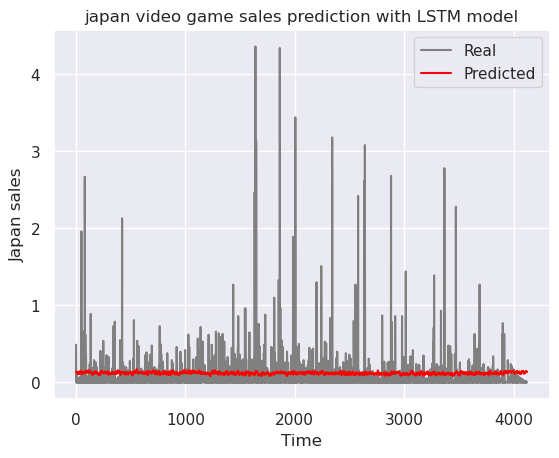

In [386]:
plot_predictions(y_test2,y_pred2)

In [387]:
return_rmse(y_test2,y_pred2)

The root mean squared error is 0.22.
